In [4]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
from matplotlib import font_manager,rc
import pykrx
import seaborn as sns
from pykrx import stock

In [5]:
#폰트 경로
font_path = "C:/Windows/Fonts/gulim.ttc"
 
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

In [6]:
kospi_df = stock.get_index_ohlcv_by_date("20181101", "20201102", "1001")
kospi_df = kospi_df.reset_index(drop = False)
kospi_df = kospi_df.iloc[:,[0,4]]
kospi_df.columns = ['Date', 'KOSPI']
kospi_df

,Date,KOSPI
0,2018-11-01,2024.46
1,2018-11-02,2096.00
2,2018-11-05,2076.92
3,2018-11-06,2089.62
4,2018-11-07,2078.69
...,...,...
489,2020-10-27,2330.84
490,2020-10-28,2345.26
491,2020-10-29,2326.67
492,2020-10-30,2267.15


In [7]:
wdhs_ver2_df = pd.read_csv("resources/wdhs_ver2/wdhs_ver2_df.csv", parse_dates=['Date'], index_col=[0], encoding = "euc-kr")
wdhs_ver2_df

,P_score,predict,real,stock_name,stock_code,Date
0,40.88,K0,P0,한화에어로스페이스,12450,2018-11-02
0,34.98,M0,P0,GS홈쇼핑,28150,2018-11-02
0,62.80,P0,P0,DB손해보험,5830,2018-11-05
0,15.34,M0,P0,현대해상,1450,2018-11-05
0,8.00,K0,M0,제놀루션,225220,2018-11-06
...,...,...,...,...,...,...
0,69.83,P0,M0,KPX생명과학,114450,2020-10-30
0,59.24,P0,M0,TCC스틸,2710,2020-10-30
0,53.16,P0,M0,조일알미늄,18470,2020-10-30
0,43.27,M0,P1,삼성엔지니어링,28050,2020-10-30


In [8]:
wdhs_ver2_winlose_test = pd.read_csv("resources/wdhs_ver2/wdhs_ver2_winlose_table_10,4,7.5,3,5.csv", parse_dates=['Date'], index_col=[0], encoding = "euc-kr")
wdhs_ver2_winlose_test = wdhs_ver2_winlose_test.sort_values("Date")
wdhs_ver2_winlose_test

,Date,stock_name,today_big_win,today_small_win,today_lose,tomorrow_big_win,tomorrow_small_win,tomorrow_lose,day2_big_win,day2_small_win,day2_lose,real_profit,Nasdaq
0,2018-11-02,한화에어로스페이스,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060662,U04
0,2018-11-02,GS홈쇼핑,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045596,U04
0,2018-11-05,DB손해보험,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.034125,D04
0,2018-11-05,현대해상,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010076,D04
0,2018-11-06,제놀루션,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,D04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020-10-30,삼성엔지니어링,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,U04
0,2020-10-30,KPX생명과학,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.050000,U04
0,2020-10-30,TCC스틸,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,U04
0,2020-10-30,조일알미늄,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.016517,U04


In [10]:
holy_2019 = pd.read_excel('resources/holiday/2019_holi.xls', parse_dates=["일자 및 요일"])
holy_2018 = pd.read_excel('resources/holiday/2018_holi.xls', parse_dates=["일자 및 요일"])
holy_2020 = pd.read_excel('resources/holiday/2020_holi.xls', parse_dates=["일자 및 요일"])
test_holy = pd.concat([holy_2019["일자 및 요일"], holy_2018["일자 및 요일"], holy_2020["일자 및 요일"]])
holy_list = list(test_holy)

sum_money = 10000000
df_date = "뒁바보"
wdhs_ver2_yield_df = pd.DataFrame({"Date" : [], "sum_money" : []})
wdhs_ver2_invest_df = pd.DataFrame({"stdate" : [], "endate" :[], "profit" : [], "invest_money" : []})

for i in range(len(wdhs_ver2_winlose_test)) :
    if wdhs_ver2_winlose_test.iloc[i,2] + wdhs_ver2_winlose_test.iloc[i,3] + wdhs_ver2_winlose_test.iloc[i,4] == 1 :
        pl_day = 0
    elif wdhs_ver2_winlose_test.iloc[i,5] + wdhs_ver2_winlose_test.iloc[i,6] + wdhs_ver2_winlose_test.iloc[i,7] == 1 :
        pl_day = 1
    elif wdhs_ver2_winlose_test.iloc[i,8] + wdhs_ver2_winlose_test.iloc[i,9] + wdhs_ver2_winlose_test.iloc[i,10] == 1 :
        pl_day = 2
    endate = wdhs_ver2_winlose_test.iloc[i,0]+datetime.timedelta(days = pl_day)
    while endate in holy_list or endate.weekday() > 4:
        endate = endate + datetime.timedelta(days = 1)
        
    temp_df = pd.DataFrame({"stdate" :[wdhs_ver2_winlose_test.iloc[i,0]], "endate" : endate,
                           "profit" : [wdhs_ver2_winlose_test.iloc[i,11]], "invest_money" : [0]})
    wdhs_ver2_invest_df = wdhs_ver2_invest_df.append(temp_df)

wdhs_ver2_yield_df["Date"] = pd.concat([wdhs_ver2_invest_df["stdate"], wdhs_ver2_invest_df["endate"]]).unique()
wdhs_ver2_yield_df = wdhs_ver2_yield_df.sort_values("Date")
wdhs_ver2_invest_df = wdhs_ver2_invest_df.reset_index(drop = True)

for num in range(len(wdhs_ver2_yield_df["Date"])) : 
    st_index = wdhs_ver2_invest_df[wdhs_ver2_invest_df["stdate"] == wdhs_ver2_yield_df.iloc[num,0]].index
    for st_idx in range(len(st_index)) :
        wdhs_ver2_invest_df.iloc[st_index[st_idx], 3] = sum_money // 10
    ed_index = wdhs_ver2_invest_df[wdhs_ver2_invest_df["endate"] == wdhs_ver2_yield_df.iloc[num, 0]].index
    if len(ed_index) == 0 :
        wdhs_ver2_yield_df.iloc[num,1] = wdhs_ver2_yield_df.iloc[num-1,1]
    if num == 0 :
        wdhs_ver2_yield_df.iloc[0,1] = sum_money
        continue
    for ed_idx in range(len(ed_index)):
         sum_money = sum_money + (wdhs_ver2_invest_df.iloc[ed_index[ed_idx], 3] * (1+wdhs_ver2_invest_df.iloc[ed_index[ed_idx], 2]))*0.9975 - wdhs_ver2_invest_df.iloc[ed_index[ed_idx], 3]
    wdhs_ver2_yield_df.iloc[num, 1] = sum_money
print(wdhs_ver2_yield_df)
wdhs_ver2_invest_df

          Date     sum_money
0   2018-11-02  1.000000e+07
1   2018-11-05  1.000755e+07
2   2018-11-06  1.013641e+07
3   2018-11-08  1.021309e+07
4   2018-11-09  1.023285e+07
..         ...           ...
478 2020-10-27  3.900096e+09
479 2020-10-28  3.998156e+09
480 2020-10-29  4.089438e+09
481 2020-10-30  4.129041e+09
483 2020-11-02  4.154130e+09

[484 rows x 2 columns]


,stdate,endate,profit,invest_money
0,2018-11-02,2018-11-02,0.060662,1000000.0
1,2018-11-02,2018-11-02,0.045596,1000000.0
2,2018-11-05,2018-11-06,0.034125,1000000.0
3,2018-11-05,2018-11-05,0.010076,1000000.0
4,2018-11-06,2018-11-06,0.100000,1000755.0
...,...,...,...,...
2267,2020-10-30,2020-10-30,0.100000,408943828.0
2268,2020-10-30,2020-10-30,-0.050000,408943828.0
2269,2020-10-30,2020-10-30,0.100000,408943828.0
2270,2020-10-30,2020-11-02,0.016517,408943828.0


In [11]:
kospi_wdhs_ver2_df = pd.merge(kospi_df, wdhs_ver2_yield_df, left_on='Date', right_on='Date', how='left')
kospi_wdhs_ver2_df.iloc[0,2] = 10000000 
kospi_wdhs_ver2_df = kospi_wdhs_ver2_df.fillna(method='ffill')
kospi_wdhs_ver2_df = kospi_wdhs_ver2_df.drop(len(kospi_wdhs_ver2_df)-1)
kospi_wdhs_ver2_df

,Date,KOSPI,sum_money
0,2018-11-01,2024.46,1.000000e+07
1,2018-11-02,2096.00,1.000000e+07
2,2018-11-05,2076.92,1.000755e+07
3,2018-11-06,2089.62,1.013641e+07
4,2018-11-07,2078.69,1.013641e+07
...,...,...,...
488,2020-10-26,2343.91,3.862635e+09
489,2020-10-27,2330.84,3.900096e+09
490,2020-10-28,2345.26,3.998156e+09
491,2020-10-29,2326.67,4.089438e+09


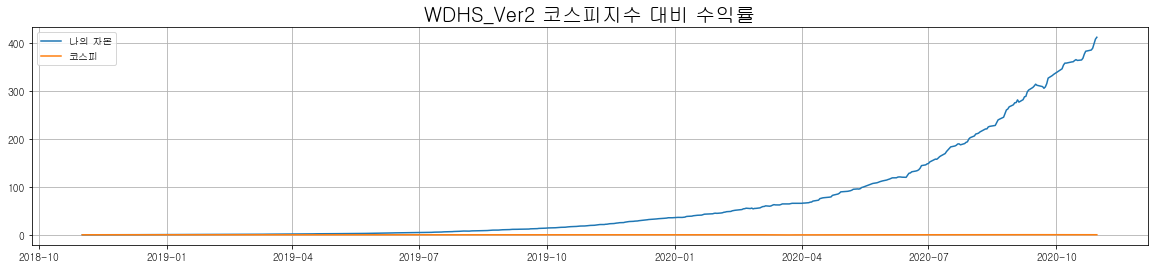

In [13]:
plt.plot(kospi_wdhs_ver2_df["Date"], kospi_wdhs_ver2_df["sum_money"]/kospi_wdhs_ver2_df.iloc[0,2], label = '나의 자본')	# line 그래프를 그립니다
plt.plot(kospi_wdhs_ver2_df["Date"], kospi_wdhs_ver2_df["KOSPI"]/kospi_wdhs_ver2_df.iloc[0,1], label = '코스피')	# line 그래프를 그립니다
#font 설정
plt.rc('font',family=font_name)
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['axes.grid'] = True
plt.legend(loc = 'best')
plt.title('WDHS_Ver2 코스피지수 대비 수익률', fontsize=20)
plt.show()	# 그래프를 화면에 보여줍니다

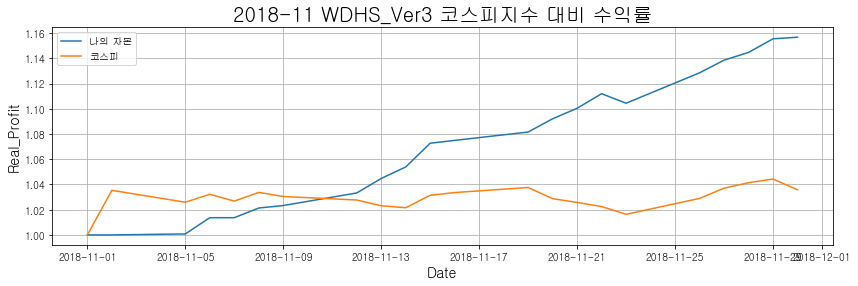

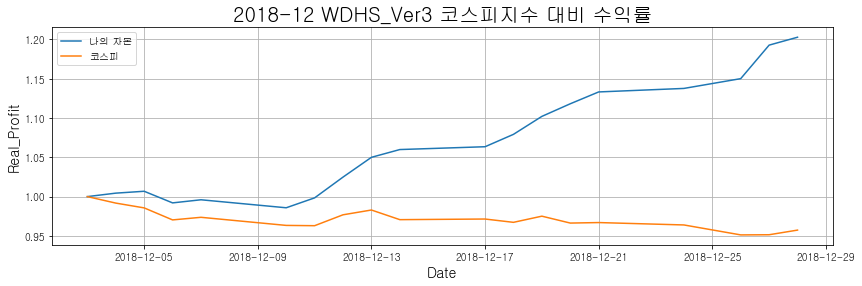

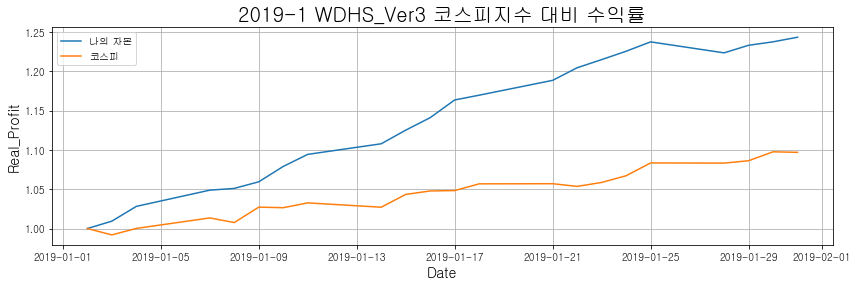

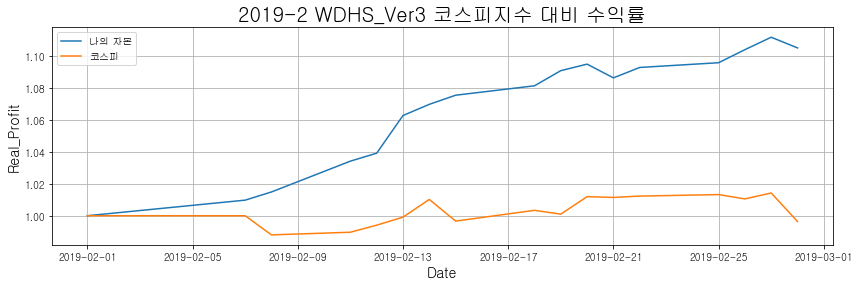

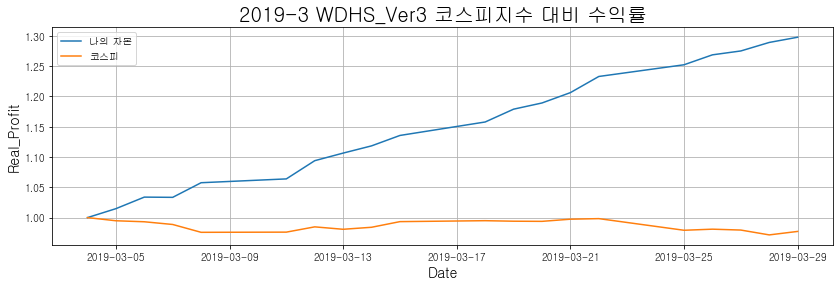

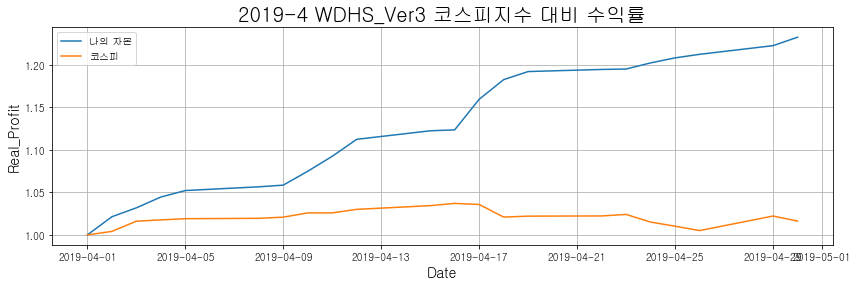

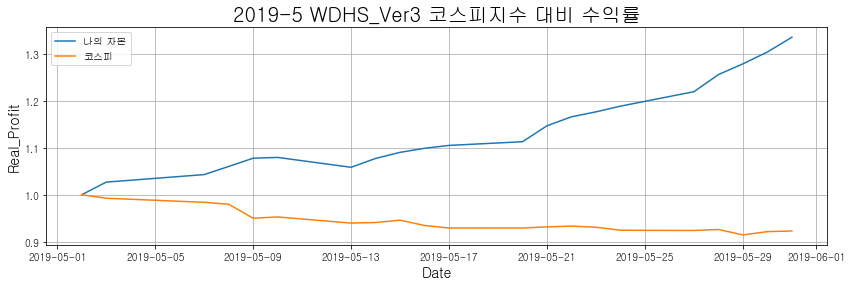

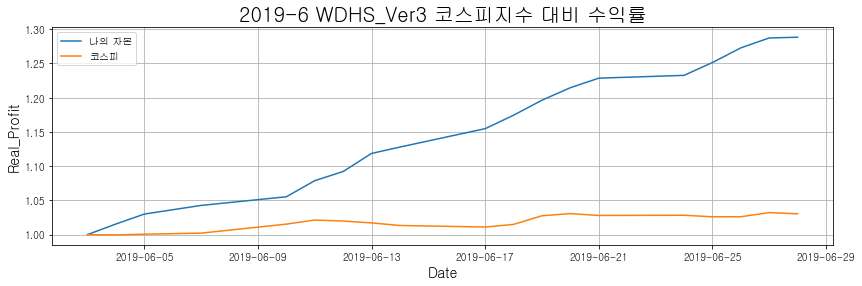

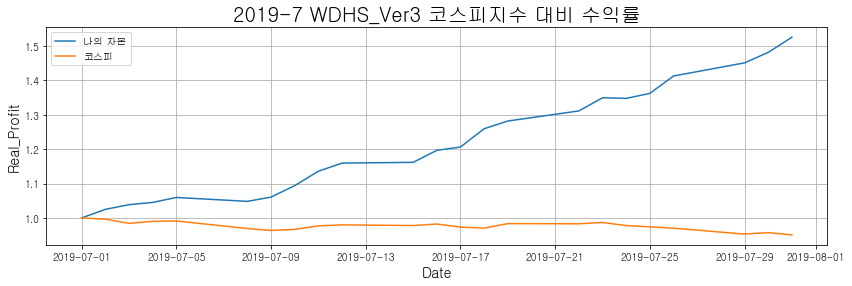

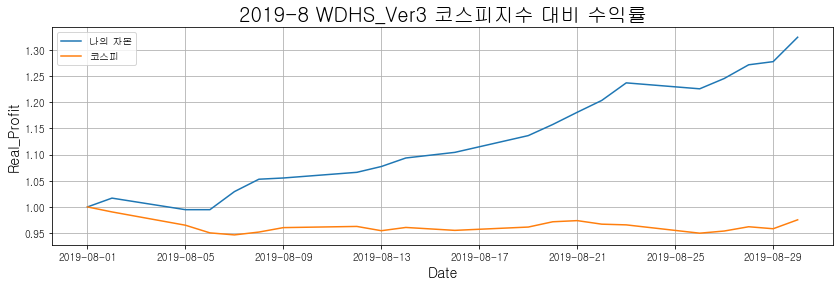

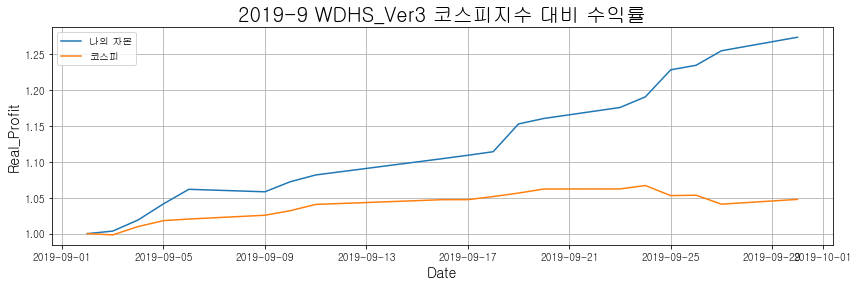

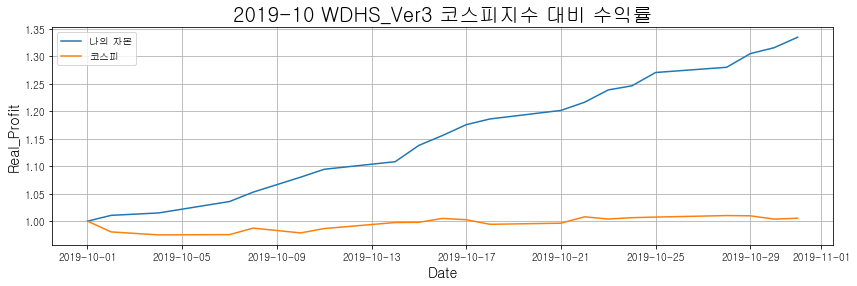

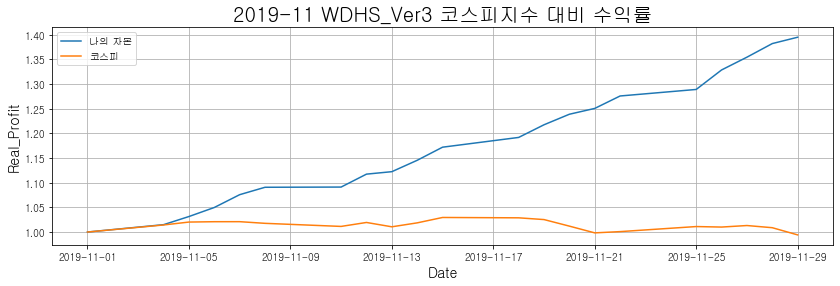

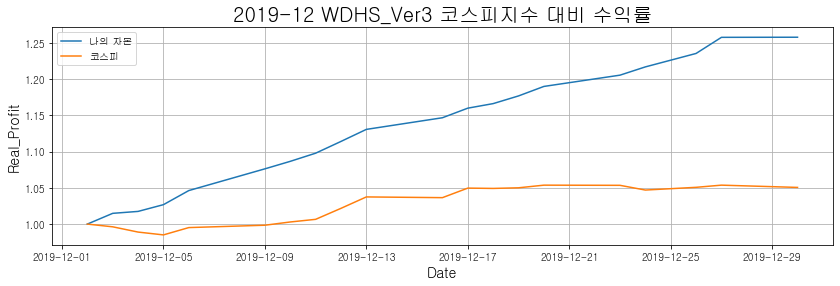

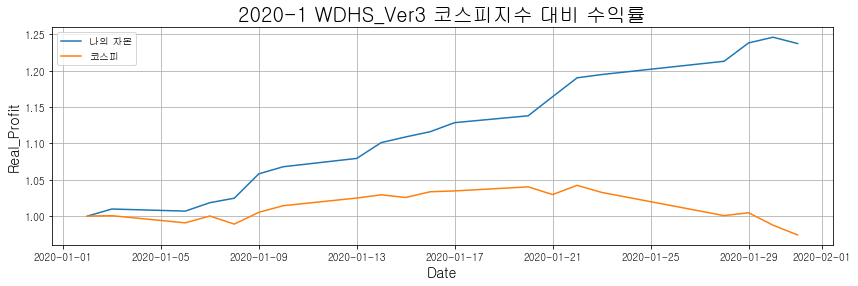

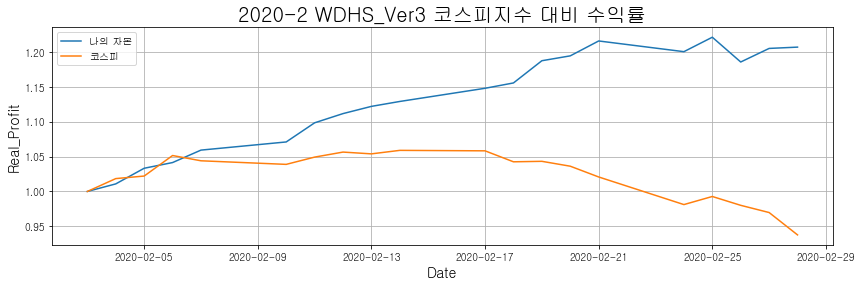

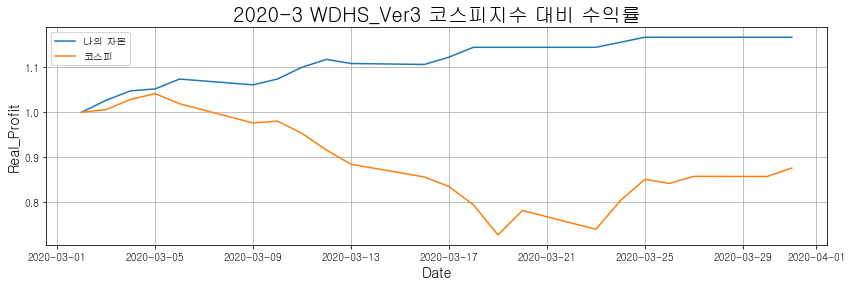

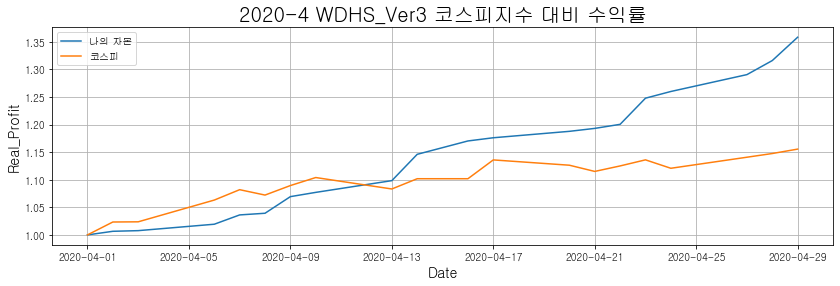

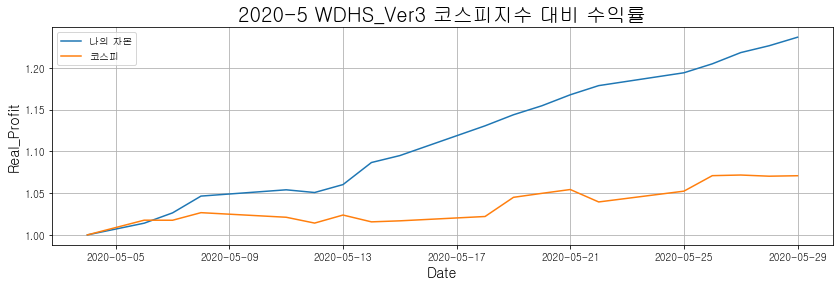

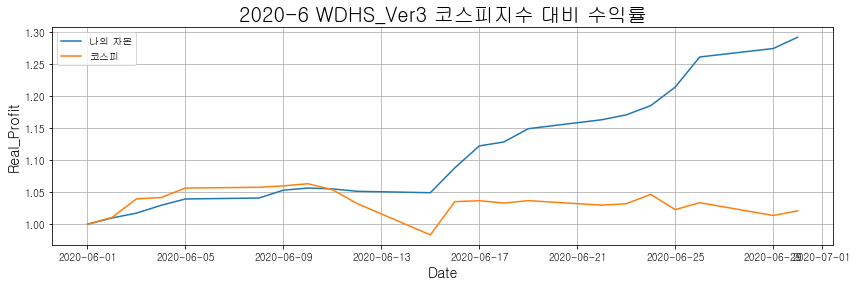

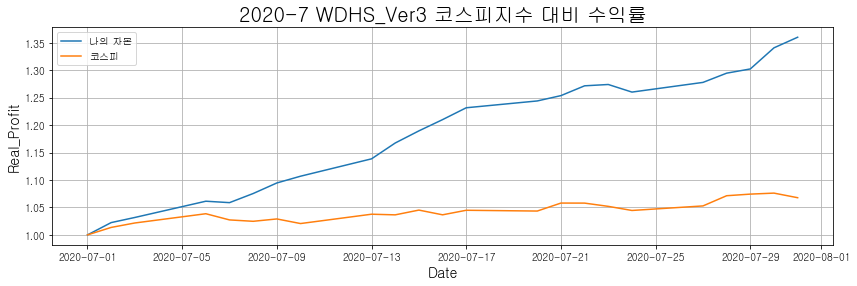

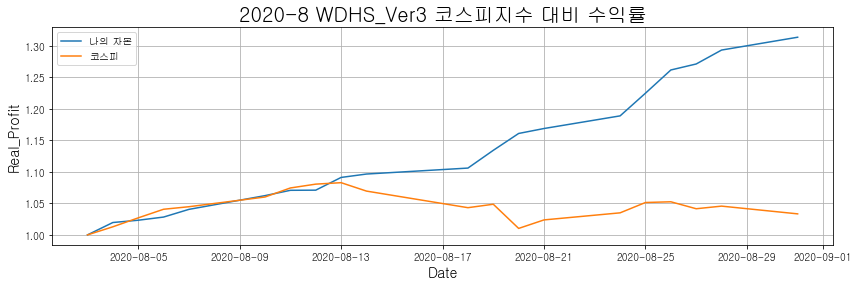

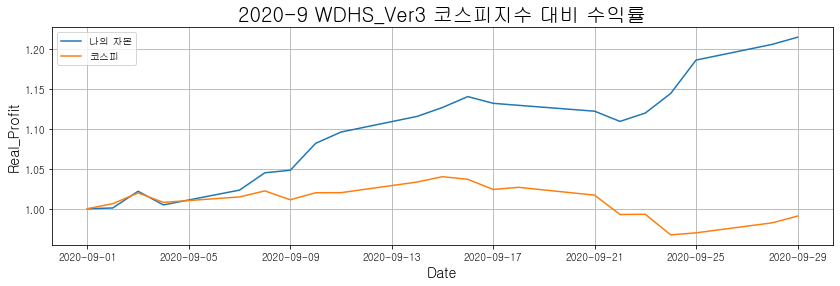

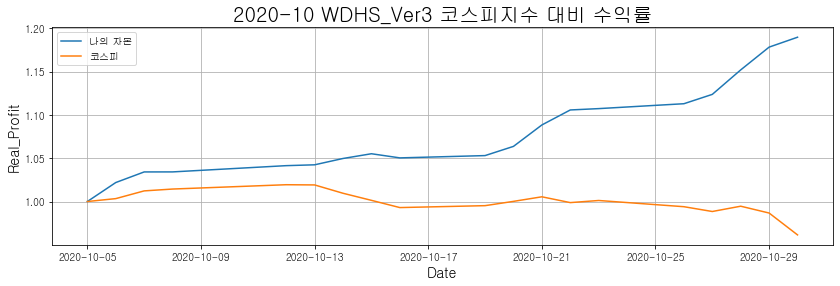

In [17]:
for year_num in range(2018,2021) :
    for month_num in range(1,13) :
        month_df = pd.DataFrame({"Date" : [], "KOSPI" : [], "sum_money" : []})
        for df_num in range(len(kospi_wdhs_ver2_df)):
            if kospi_wdhs_ver2_df.iloc[df_num,0].year == year_num and kospi_wdhs_ver2_df.iloc[df_num,0].month == month_num:
                temp_df = kospi_wdhs_ver2_df.iloc[df_num]
                month_df = month_df.append(temp_df)
        if len(month_df) != 0:
            month_df["KOSPI"] = month_df["KOSPI"] / month_df.iloc[0,1]
            month_df["sum_money"] = month_df["sum_money"] / month_df.iloc[0,2]
            plt.rc('font',family=font_name)
            plt.rcParams["figure.figsize"] = (14,4)
            plt.rcParams['axes.grid'] = True
            plt.plot(month_df["Date"], month_df["sum_money"], label = '나의 자본')	# line 그래프를 그립니다
            plt.plot(month_df["Date"], month_df["KOSPI"], label = '코스피')	# line 그래프를 그립니다
            plt.title('{}-{} WDHS_Ver3 코스피지수 대비 수익률'.format(year_num, month_num), fontsize=20)
            plt.xlabel('Date', fontsize=14)
            plt.ylabel('Real_Profit', fontsize=14)
            plt.legend(loc = 'best')
            plt.show()	# 그래프를 화면에 보여줍니다

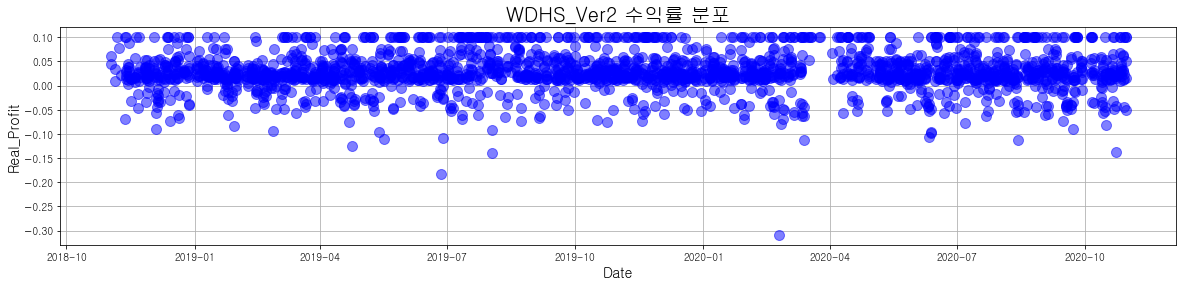

In [16]:
plt.plot('Date',  # x
         'real_profit',  # y
         data=wdhs_ver2_winlose_test, 
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.rc('font', family=font_name)
plt.title('WDHS_Ver2 수익률 분포', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Real_Profit', fontsize=14)
plt.show()

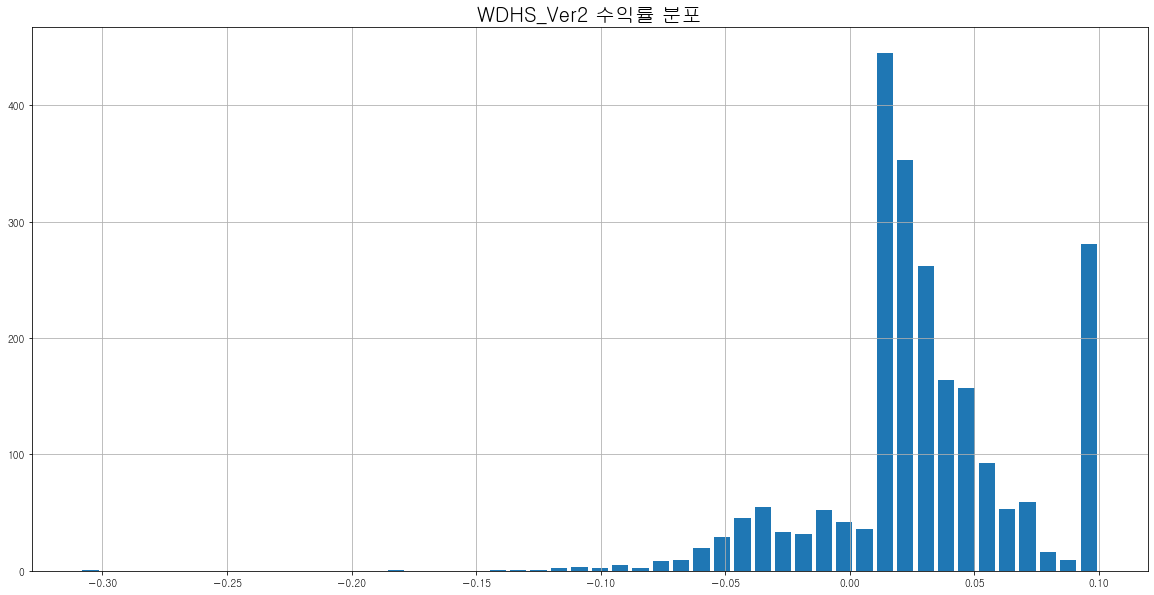

In [19]:
plt.hist(wdhs_ver2_winlose_test["real_profit"], rwidth = 0.8, bins = 50)
plt.rcParams["figure.figsize"] = (20,10)
plt.rc('font',family=font_name)
plt.title('WDHS_Ver2 수익률 분포', fontsize=20)
plt.show()